# Project 2

### Betsy Rosalen and Mikhail Groysman

## Project Overview

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Monday 10/14. .

## 1. Choosing the data

We have decide to build on __flight data from [OpenFlights.org](https://openflights.org/data.html)__ from our first project.

We already have __Routes__ sets loaded. We will use __Airplanes__ as our second node.



## Loading the data

First import necessary packages for plotting graphs using NetworkX and Matplotlib and set up graph size parameters...

In [124]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,12)

Read in __Routes__ data to a Pandas dataframe.

In [125]:
routes_raw = pd.read_csv("Project1_Data/routes.dat", 
                       header=None, sep=",", 
                       usecols=[2, 4], 
                       names=['Airline', 'Airport'])

#routes_raw1=routes_raw.drop_duplicates(subset=['Airline', 'Airport'],keep=False) 
routes_raw=routes_raw.dropna()

routes_raw=routes_raw[routes_raw.Airport!="\\N"]

In [126]:
routes_raw.head()

Airline Airport
0     AER     KZN
1     ASF     KZN
2     ASF     MRV
3     CEK     KZN
4     CEK     OVB

In [127]:
aa = routes_raw.copy()

In [128]:
#df['sum_A'] = df.groupby('B')['A'].transform('sum')

In [129]:
aa['weight'] = aa.groupby('Airline')['Airport'].transform('count')#.reset_index()

In [130]:
aa.head(10)

Airline Airport  weight
0     AER     KZN      26
1     ASF     KZN       8
2     ASF     MRV       8
3     CEK     KZN      20
4     CEK     OVB      20
5     DME     KZN     324
6     DME     NBC     324
7     DME     TGK     324
8     DME     UUA     324
9     EGO     KGD      11

In [131]:
#aa['Airline'] = 'Airline_' + aa.Airline.map(str)
#aa['Airport'] = 'Airport_' + aa.Airport.map(str)

In [132]:
aa.head(10)

Airline Airport  weight
0     AER     KZN      26
1     ASF     KZN       8
2     ASF     MRV       8
3     CEK     KZN      20
4     CEK     OVB      20
5     DME     KZN     324
6     DME     NBC     324
7     DME     TGK     324
8     DME     UUA     324
9     EGO     KGD      11

In [133]:
len(aa)

67663

In [134]:
airports_raw = pd.read_csv("Project1_Data/airports.dat", 
                       header=None, sep=",", 
                       usecols=[0,1, 2, 3, 4, 6, 7], 
                       names=['Airport','Airport Name','City','Country','IATA', 'Latitude', 'Longitude'])
#airports_raw1=airports_raw[airports_raw.Country=='France']

In [135]:
airports_raw.head()

Airport                                 Airport Name          City  \
0        1                               Goroka Airport        Goroka   
1        2                               Madang Airport        Madang   
2        3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3        4                               Nadzab Airport        Nadzab   
4        5  Port Moresby Jacksons International Airport  Port Moresby   

            Country IATA  Latitude   Longitude  
0  Papua New Guinea  GKA -6.081690  145.391998  
1  Papua New Guinea  MAG -5.207080  145.789001  
2  Papua New Guinea  HGU -5.826790  144.296005  
3  Papua New Guinea  LAE -6.569803  146.725977  
4  Papua New Guinea  POM -9.443380  147.220001

In [136]:
len(airports_raw)

7698

In [137]:
airports = airports_raw.copy()

In [138]:
#airports['Airport']='Airport_' + airports.IATA.map(str)
airports['Airport']=airports.IATA

In [139]:
aa_merged = pd.merge(aa,airports,left_on='Airport',right_on='Airport',how='inner')

In [140]:
aa_merged.head(20)

Airline Airport  weight                 Airport Name   City Country IATA  \
0      AER     KZN      26  Kazan International Airport  Kazan  Russia  KZN   
1      ASF     KZN       8  Kazan International Airport  Kazan  Russia  KZN   
2      CEK     KZN      20  Kazan International Airport  Kazan  Russia  KZN   
3      DME     KZN     324  Kazan International Airport  Kazan  Russia  KZN   
4      EGO     KZN      11  Kazan International Airport  Kazan  Russia  KZN   
5      LED     KZN     184  Kazan International Airport  Kazan  Russia  KZN   
6      SVX     KZN      98  Kazan International Airport  Kazan  Russia  KZN   
7      AYT     KZN     127  Kazan International Airport  Kazan  Russia  KZN   
8      LED     KZN     184  Kazan International Airport  Kazan  Russia  KZN   
9      DWC     KZN      48  Kazan International Airport  Kazan  Russia  KZN   
10     SHJ     KZN      97  Kazan International Airport  Kazan  Russia  KZN   
11     FEG     KZN       7  Kazan International Airport  Kazan  Russia  KZN   
12     SKD     KZN       8  Kazan International Airport  Kazan  Russia  KZN   
13     TAS     KZN      81  Kazan International Airport  Kazan  Russia  KZN   
14     ALA     KZN      67  Kazan International Airport  Kazan  Russia  KZN   
15     DME     KZN     324  Kazan International Airport  Kazan  Russia  KZN   
16     LED     KZN     184  Kazan International Airport  Kazan  Russia  KZN   
17     SVO     KZN     199  Kazan International Airport  Kazan  Russia  KZN   
18     DYU     KZN      52  Kazan International Airport  Kazan  Russia  KZN   
19     LBD     KZN      33  Kazan International Airport  Kazan  Russia  KZN   

     Latitude  Longitude  
0   55.606201  49.278702  
1   55.606201  49.278702  
2   55.606201  49.278702  
3   55.606201  49.278702  
4   55.606201  49.278702  
5   55.606201  49.278702  
6   55.606201  49.278702  
7   55.606201  49.278702  
8   55.606201  49.278702  
9   55.606201  49.278702  
10  55.606201  49.278702  
11  55.606201  49.278702  
12  55.606201  49.278702  
13  55.606201  49.278702  
14  55.606201  49.278702  
15  55.606201  49.278702  
16  55.606201  49.278702  
17  55.606201  49.278702  
18  55.606201  49.278702  
19  55.606201  49.278702

In [141]:
airport_nodes = aa_merged[['Airport','Airport Name','City','Country','IATA','Latitude','Longitude']].drop_duplicates()

In [142]:
airport_nodes.head()

Airport                 Airport Name             City Country IATA  \
0       KZN  Kazan International Airport            Kazan  Russia  KZN   
28      MRV     Mineralnyye Vody Airport  Mineralnye Vody  Russia  MRV   
50      OVB           Tolmachevo Airport      Novosibirsk  Russia  OVB   
140     NBC            Begishevo Airport      Nizhnekamsk  Russia  NBC   
147     TGK      Taganrog Yuzhny Airport         Taganrog  Russia  TGK   

      Latitude  Longitude  
0    55.606201  49.278702  
28   44.225101  43.081902  
50   55.012600  82.650703  
140  55.564701  52.092499  
147  47.198333  38.849167

## Create NetworkX Graph Object

...

In [143]:
B = nx.Graph()
B.add_nodes_from(aa_merged['Airline'], bipartite=0)
B.add_nodes_from(aa_merged['Airport'], bipartite=1)
B.add_weighted_edges_from([tuple(d) for d in aa_merged[['Airline','Airport','weight']].values])

nx.set_node_attributes(B, airport_nodes.set_index('Airport').to_dict('index'))

Let's double check if our attributes were saved in the graph data.

In [144]:
list(B.nodes(data=True))[:3]

[('AER',
  {'bipartite': 1,
   'Airport Name': 'Sochi International Airport',
   'City': 'Sochi',
   'Country': 'Russia',
   'IATA': 'AER',
   'Latitude': 43.449902,
   'Longitude': 39.9566}),
 ('ASF',
  {'bipartite': 1,
   'Airport Name': 'Astrakhan Airport',
   'City': 'Astrakhan',
   'Country': 'Russia',
   'IATA': 'ASF',
   'Latitude': 46.2832984924,
   'Longitude': 48.0063018799}),
 ('CEK',
  {'bipartite': 1,
   'Airport Name': 'Chelyabinsk Balandino Airport',
   'City': 'Chelyabinsk',
   'Country': 'Russia',
   'IATA': 'CEK',
   'Latitude': 55.305801,
   'Longitude': 61.5033})]

In [145]:
list(B.nodes(data=True))[-2:]

[('CMP',
  {'bipartite': 1,
   'Airport Name': 'Santana do Araguaia Airport',
   'City': 'Santana do Araguaia',
   'Country': 'Brazil',
   'IATA': 'CMP',
   'Latitude': -9.31997013092041,
   'Longitude': -50.32849884033203}),
 ('KHZ',
  {'bipartite': 1,
   'Airport Name': 'Kauehi Airport',
   'City': 'Kauehi',
   'Country': 'French Polynesia',
   'IATA': 'KHZ',
   'Latitude': -15.780799865722654,
   'Longitude': -145.12399291992188})]

In [146]:
B.get_edge_data('Airline_AER','Airport_KZN')

In [147]:
print(nx.info(B))

Name: 
Type: Graph
Number of nodes: 3388
Number of edges: 19160
Average degree:  11.3105


In [148]:
airline_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
airport_nodes = set(B) - airline_nodes

In [149]:
nx.is_connected(B)

False

In [150]:
bi.is_bipartite(B)

False

In [151]:
print(bi.density(B, airline_nodes))

0.04425811071457445


In [152]:
print(bi.density(B, airport_nodes))

0.04425811071457445


### Island Method on Graph with Both Node Types

In [153]:
'''
# textbook function doesn't work...
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, edata)
    return g2
'''
def trim_edges(g, weight=1): 
    g2=nx.Graph()  
    my_list=[]
    my_list1=[]
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            my_list.append(f)
            my_list1.append(to)
            g2.add_edge(f,to,attr_dict={weight:edata['weight']})
    g2.add_nodes_from(my_list, bipartite=0)
    g2.add_nodes_from(my_list1, bipartite=1)
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [154]:
island = island_method(B)
for i in island:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 3260 6
183 1675 1
365 865 1
547 258 1
729 190 1
911 190 1


#### Largest Subgraph

In [186]:
G0=max(nx.connected_component_subgraphs(island[0][1]), key=len)

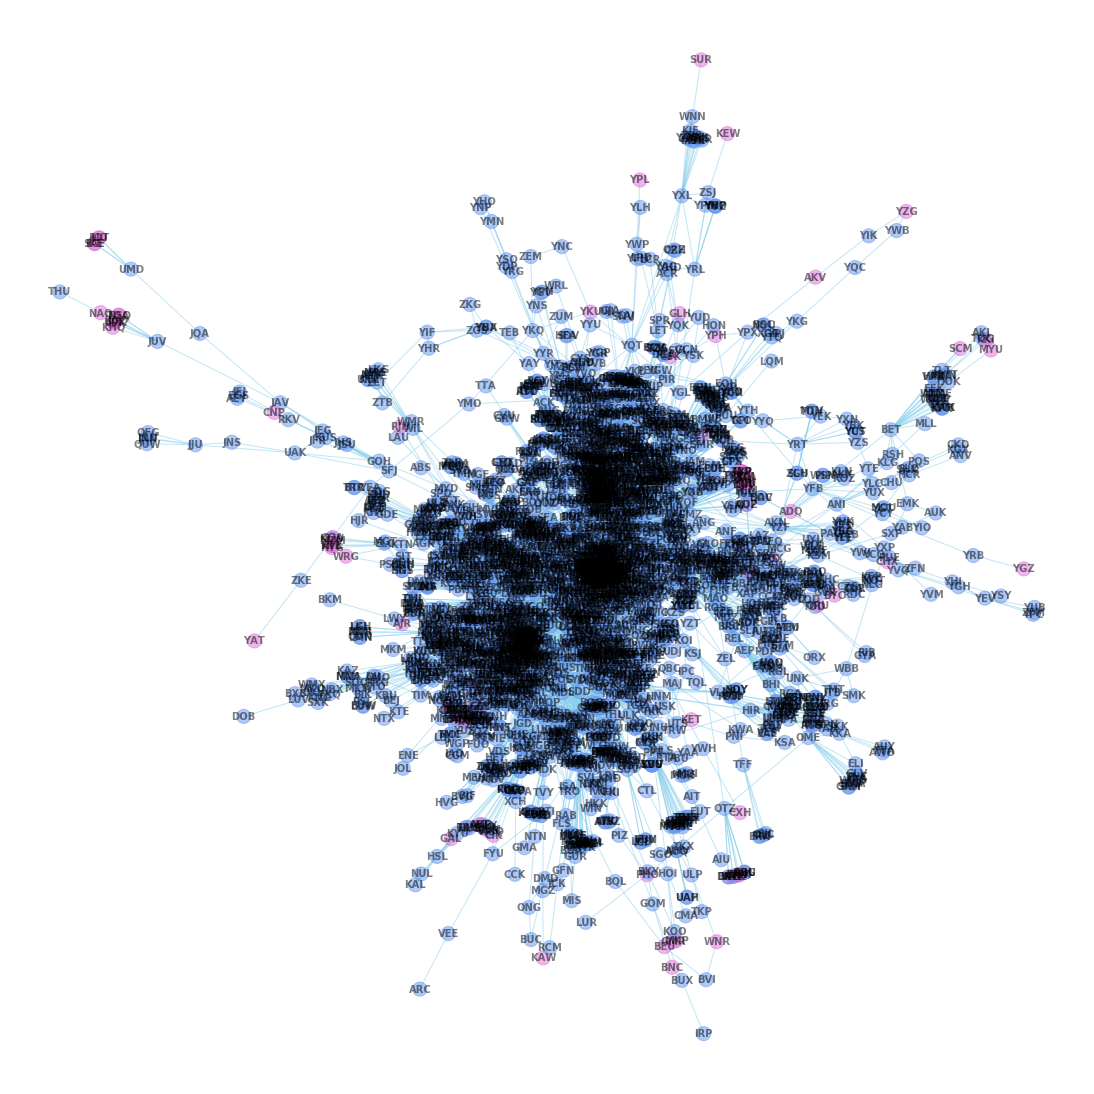

In [187]:
colors = []
for node, data in G0.nodes(data=True):
    if data['bipartite'] == 1: 
        colors.append('cornflowerblue') # Airports in Blue    
    else:
        colors.append('orchid')  # Airlines in pink

#nx.draw(G, with_labels=True, node_size=100, node_color=colors, font_size=10, font_family="calibri", width=1,
#                  edge_color="black", alpha=0.8)

nx.draw(G0, 
        with_labels=True, 
        node_color=colors, 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

#### Second Largest Subgraph

In [169]:
G1=island[1][1]

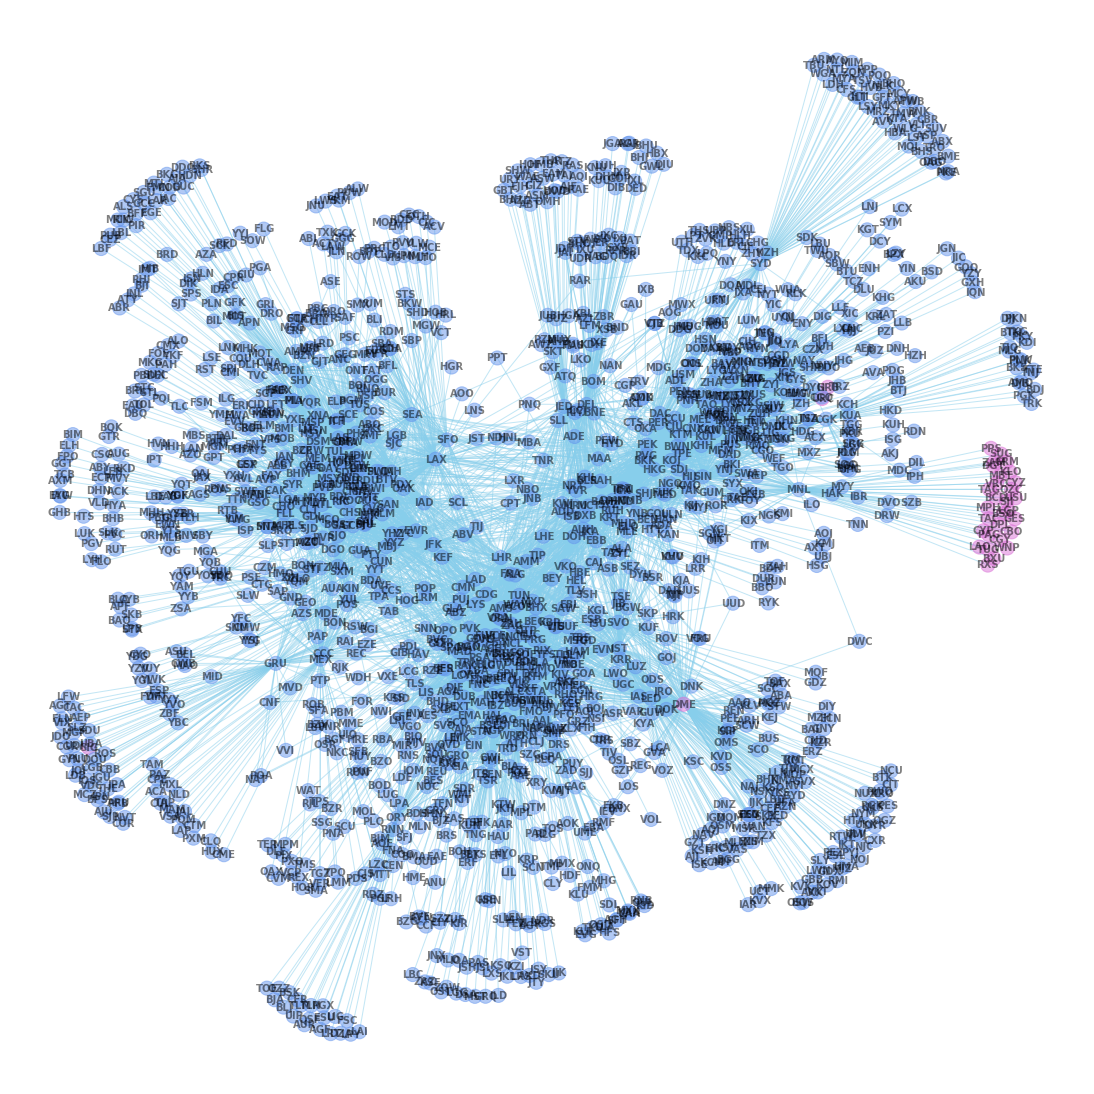

In [170]:
colors = []
for node, data in G1.nodes(data=True):
    if data['bipartite'] == 1: 
        colors.append('cornflowerblue') # Airports in Blue    
    else:
        colors.append('orchid')  # Airlines in pink

#nx.draw(G, with_labels=True, node_size=100, node_color=colors, font_size=10, font_family="calibri", width=1,
#                  edge_color="black", alpha=0.8)

nx.draw(G1, 
        with_labels=True, 
        node_color=colors, 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

#### Third Largest Subgraph

In [157]:
G2=island[2][1]

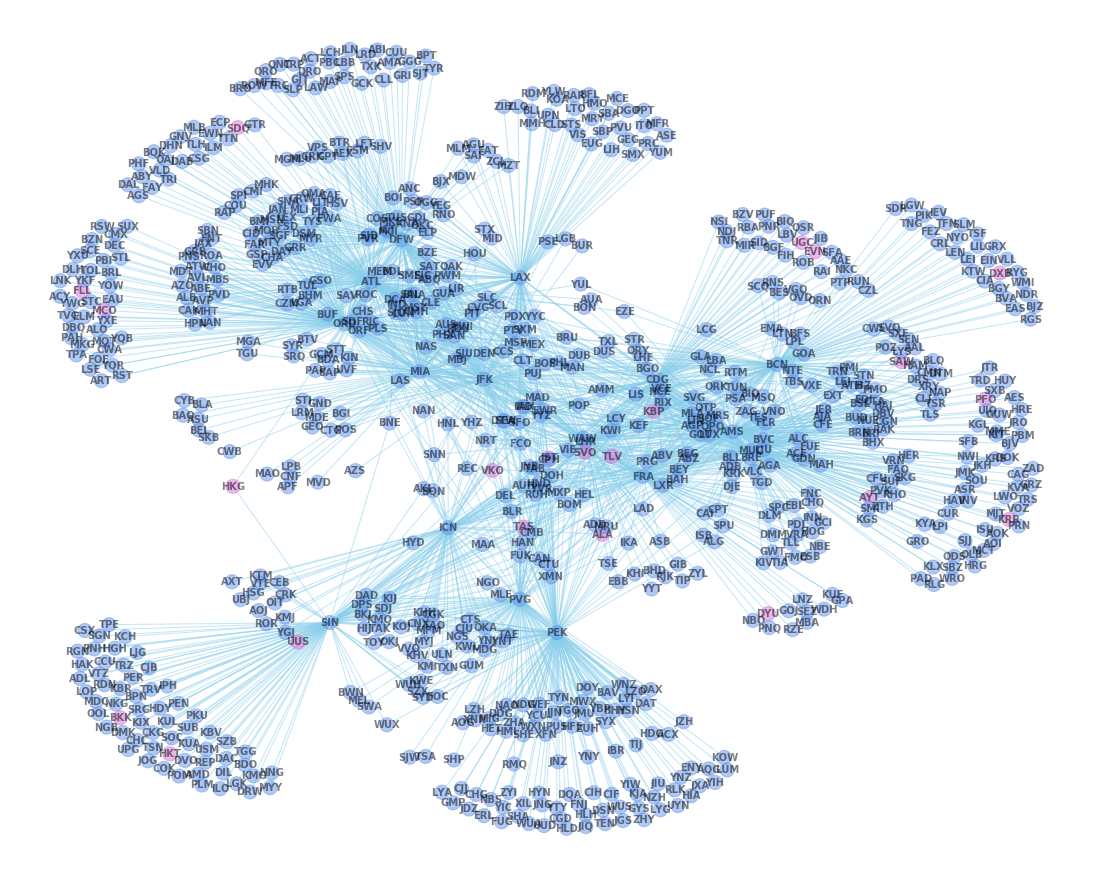

In [158]:
colors = []
for node, data in G2.nodes(data=True):
    if data['bipartite'] == 1: 
        colors.append('cornflowerblue') # Airports in Blue    
    else:
        colors.append('orchid')  # Airlines in pink

#nx.draw(G, with_labels=True, node_size=100, node_color=colors, font_size=10, font_family="calibri", width=1,
#                  edge_color="black", alpha=0.8)

nx.draw(G2, 
        with_labels=True, 
        node_color=colors, 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

In [159]:
G3=island[3][1]

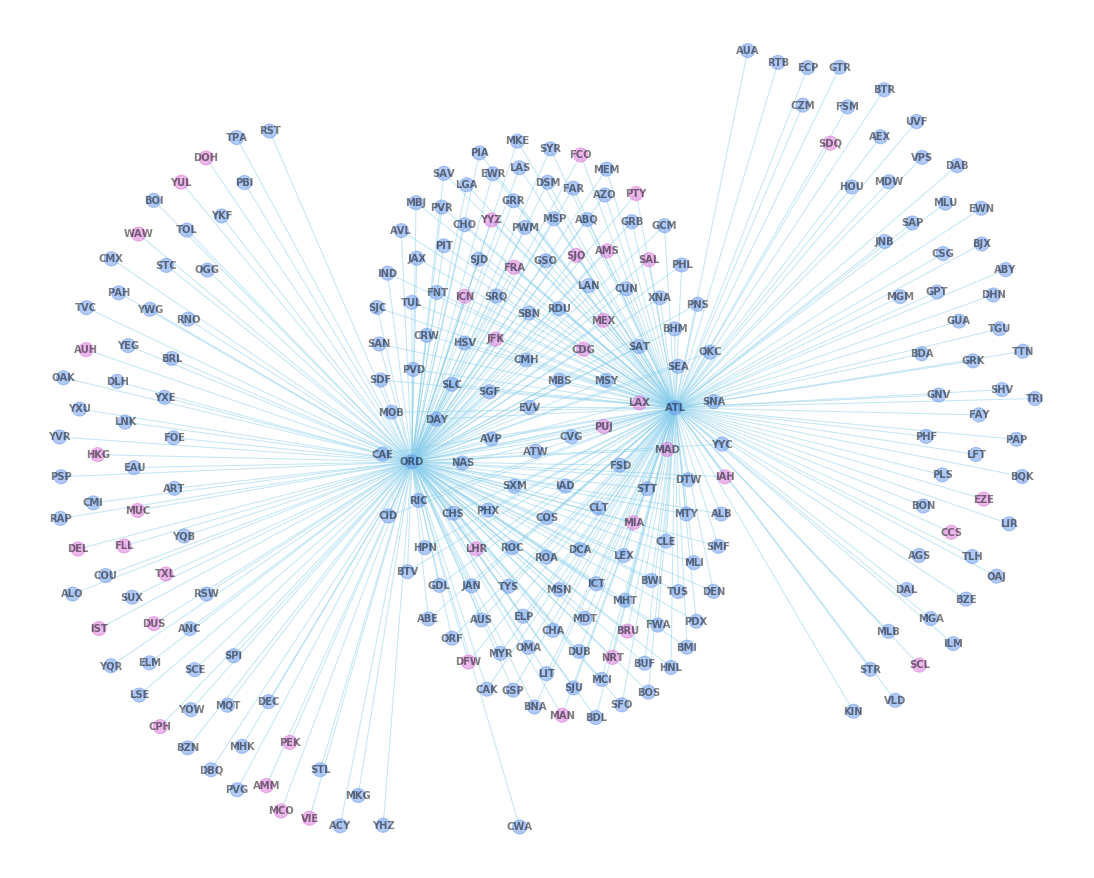

In [160]:
colors = []
for node, data in G3.nodes(data=True):
    if data['bipartite'] == 1: 
        colors.append('cornflowerblue') # Airports in Blue    
    else:
        colors.append('orchid')  # Airlines in pink

#nx.draw(G, with_labels=True, node_size=100, node_color=colors, font_size=10, font_family="calibri", width=1,
#                  edge_color="black", alpha=0.8)

nx.draw(G3, 
        with_labels=True, 
        node_color=colors, 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="skyblue", 
        alpha=0.5)

### Airport Nodes Only

In [161]:
# compute an affiliation network of the Airports
airports = bi.weighted_projected_graph(B, airport_nodes)

# Find the largest connected subgraph in the network
#users_subgraph = nx.connected_component_subgraphs(users)[0]  # textbook code doesn't work
airports_subgraph = max(nx.connected_component_subgraphs(airports), key=len)  # alternate method

airports_subgraph.name = "Airports"

print(nx.info(airports_subgraph))

Name: Airports
Type: Graph
Number of nodes: 3358
Number of edges: 338269
Average degree: 201.4705


In [162]:
nx.is_connected(airports_subgraph)

True

In [163]:
bi.is_bipartite(airports_subgraph)

False

In [164]:
airport_islands=island_method(airports_subgraph)
for i in airport_islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 2305 27
33 237 2
65 91 2
97 34 3
129 10 2
161 2 1


In [172]:
API=max(nx.connected_component_subgraphs(airport_islands[0][1]), key=len)

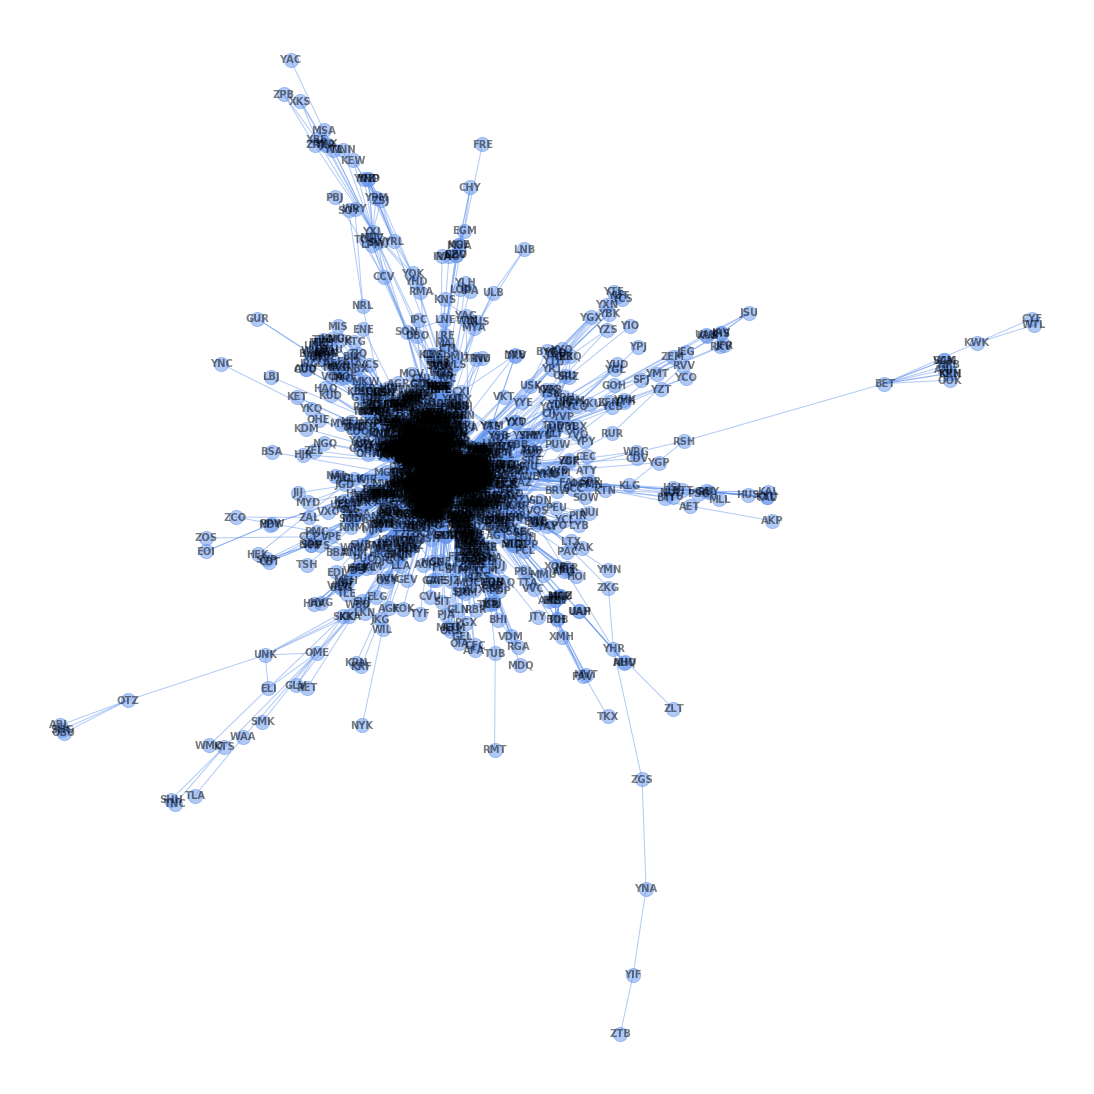

In [182]:
# set plot size
plt.rcParams["figure.figsize"] = (15,15)

nx.draw(API,  
        with_labels=True, 
        node_color='cornflowerblue', 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="cornflowerblue", 
        alpha=0.5)

### Airline Nodes Only

In [175]:
# compute an affiliation network of the Airlines
airlines = bi.weighted_projected_graph(B, airline_nodes)

# Find the largest connected subgraph in the network
#users_subgraph = nx.connected_component_subgraphs(users)[0]  # textbook code doesn't work
airlines_subgraph = max(nx.connected_component_subgraphs(airlines), key=len)  # alternate method

airlines_subgraph.name = "Airlines"

print(nx.info(airlines_subgraph))

Name: Airlines
Type: Graph
Number of nodes: 1693
Number of edges: 4549
Average degree:   5.3739


In [176]:
nx.is_connected(airlines_subgraph)

True

In [177]:
bi.is_bipartite(airlines_subgraph)

False

In [178]:
airline_islands=island_method(airlines_subgraph)
for i in airline_islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1]))))

1 527 8
6 88 3
11 50 1
16 35 1
21 10 1


In [179]:
ALI=max(nx.connected_component_subgraphs(airline_islands[0][1]), key=len)

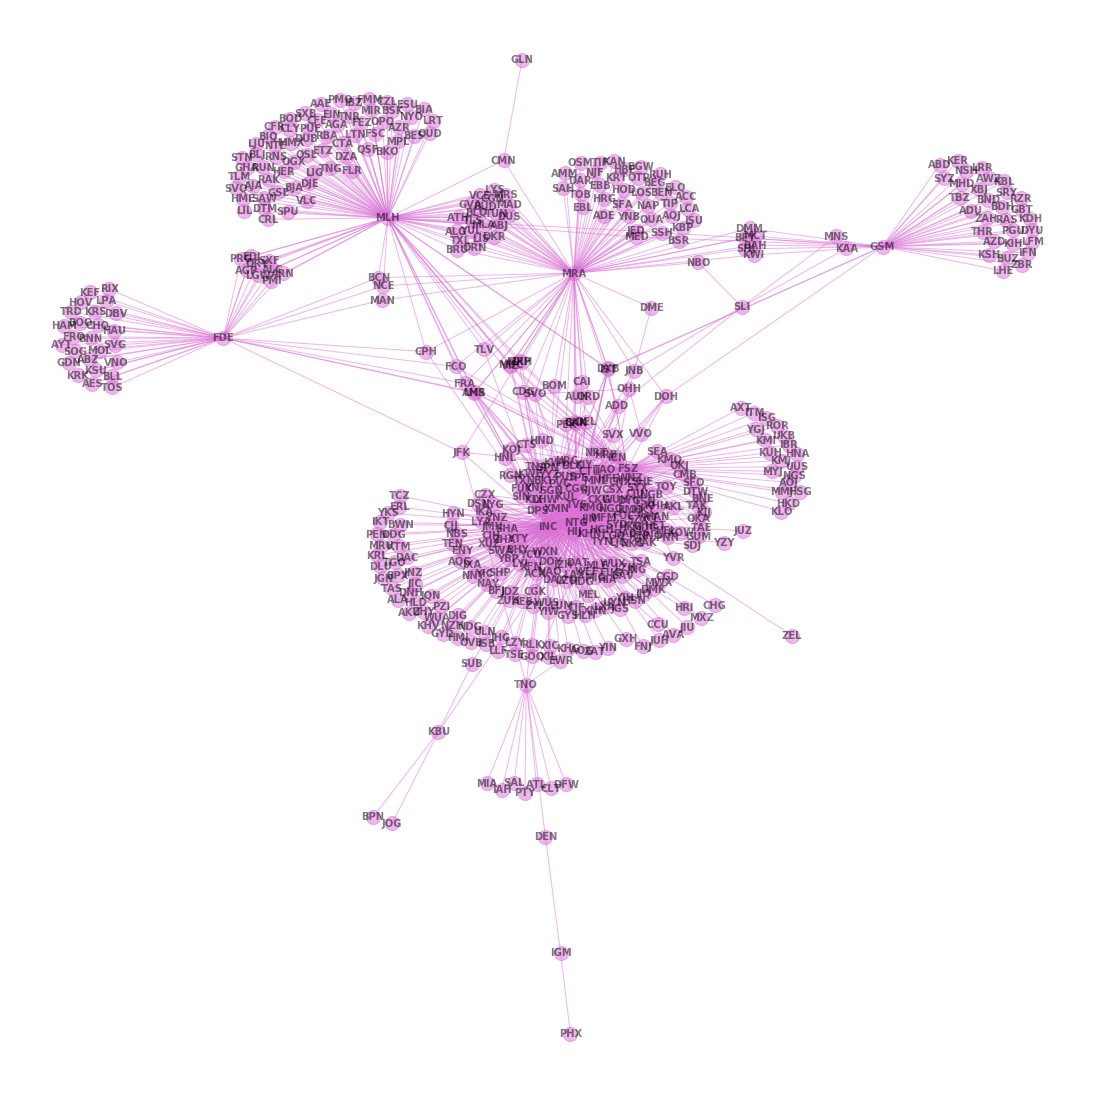

In [183]:
# set plot size
plt.rcParams["figure.figsize"] = (15,15)

nx.draw(ALI,  
        with_labels=True, 
        node_color='orchid', 
        node_size=200, 
        font_size=10, 
        font_weight='bold', 
        edge_color="orchid", 
        alpha=0.5)